In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

En este notebook exploraremos y analizaremos los datos de las peliculas (movies.csv)

In [2]:
df_movies = pd.read_csv('../raw/ml-20m/movies.csv')
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
27273,131254,Kein Bund für's Leben (2007),Comedy
27274,131256,"Feuer, Eis & Dosenbier (2002)",Comedy
27275,131258,The Pirates (2014),Adventure
27276,131260,Rentun Ruusu (2001),(no genres listed)


In [8]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


Tenemos un total de 27278 filas y 3 columnas (siendo el id una de ellas)

In [9]:
df_movies.isna().sum() # Comprobamos valores nulos

movieId    0
title      0
genres     0
dtype: int64

In [11]:
df_movies.nunique() # Comprobamos los valores duplicados por columnas

movieId    27278
title      27262
genres      1342
dtype: int64

Aqui podemos observar como tenemos 16 titulos con el mismo nombre.

In [45]:
# Extraemos el numero de filas duplicadas en funcion del title
title_duplicate = df_movies[df_movies.duplicated(subset='title', keep=False)]
print(title_duplicate.drop_duplicates(subset='title').count()) # Eliminamos por cada registro 1, dejando solo el duplicado 

# Obtener el nombre de los títulos únicos duplicados
unique_titles_duplicated = title_duplicate['title'].unique()
# Mostrar los títulos únicos duplicados
print(f'\n Titulos: {unique_titles_duplicated}')

movieId    16
title      16
genres     16
dtype: int64

 Titulos: ['Aladdin (1992)' 'Emma (1996)' 'Men with Guns (1997)' 'Hamlet (2000)'
 'War of the Worlds (2005)' 'Casanova (2005)' 'Chaos (2005)'
 'Offside (2006)' 'Blackout (2007)' 'Darling (2007)' 'Girl, The (2012)'
 '20,000 Leagues Under the Sea (1997)' 'Beneath (2013)'
 'Clear History (2013)' 'Johnny Express (2014)' 'Paradise (2013)']


Mostramos las posiciones de las filas originales y duplicadas.

In [46]:
# Imprimir las filas correspondientes a cada título origen/duplicado
for title in unique_titles_duplicated:
    print(title)
    print(title_duplicate[title_duplicate['title'] == title])
    print()

Aladdin (1992)
       movieId           title                                       genres
582        588  Aladdin (1992)  Adventure|Animation|Children|Comedy|Musical
24092   114240  Aladdin (1992)  Adventure|Animation|Children|Comedy|Fantasy

Emma (1996)
      movieId        title                genres
823       838  Emma (1996)  Comedy|Drama|Romance
9135    26958  Emma (1996)               Romance

Men with Guns (1997)
      movieId                 title        genres
1716     1788  Men with Guns (1997)  Action|Drama
9150    26982  Men with Guns (1997)         Drama

Hamlet (2000)
       movieId          title                        genres
3507      3598  Hamlet (2000)  Crime|Drama|Romance|Thriller
13354    65665  Hamlet (2000)                         Drama

War of the Worlds (2005)
       movieId                     title                            genres
10224    34048  War of the Worlds (2005)  Action|Adventure|Sci-Fi|Thriller
13269    64997  War of the Worlds (2005)              

Comprobamos y analizamos los generos

In [3]:
def pie_plot(top):
    # Grafico de los 5 generos mas frecuentes
    colors = sns.color_palette('pastel')[0:5]
    plt.pie(x=top, labels = top.index, colors = colors, autopct='%.0f%%', startangle=90)
    plt.title('Distribución de los 5 Géneros más Frecuentes')
    plt.show()

In [4]:
def proportion_genres(valor, df = df_movies):
    # Obtenemos los valores de genero
    genre = df['genres']

    # Obtenemos la probabilidad por cada genero
    genre_proba = genre.value_counts(normalize=True)

    # Capturamos los generos de mayor probabilidad (segun valor)
    top = genre_proba.head(valor) 

    # Llamada a funcion para pintar grafico
    pie_plot(top)

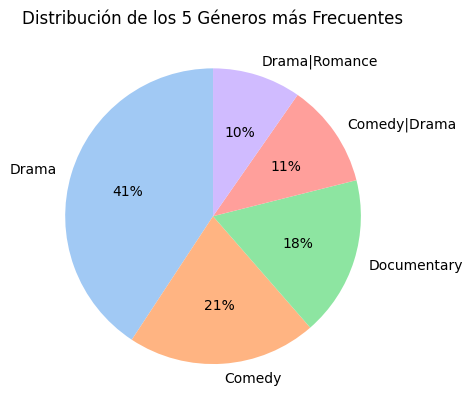

In [12]:
proportion_genres(5)

Podemos observar como drama suele aparecer bastante, seguido por comedia y documental.

Podemos afirmar que la mayoria de las peliculas suelen centrarse en estos generos.

In [13]:
df_movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Analizamos las fechas de lanzamiento

In [3]:
# Extraemos con expresiones regulares las fecha del title, rellenamos los nulos con 0 y casteamos a int
years_movies = df_movies['title'].str.extract(r'\((\d{4})\)', expand=False)
years_movies.fillna('0', inplace=True)
years_movies = years_movies.apply(lambda x: int(x))

In [4]:
# Copiamos el df original y le añadimos la columna año
df_movies_copy = df_movies.copy()
df_movies_copy['year']= years_movies

In [5]:
df_movies_copy.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [5]:
# Eliminamos de title el año (ya lo tenemos en una columna aparte)
df_movies_copy['title'] = df_movies_copy['title'].apply(lambda x: x.split(' (')[0])
df_movies_copy

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
27273,131254,Kein Bund für's Leben,Comedy,2007
27274,131256,"Feuer, Eis & Dosenbier",Comedy,2002
27275,131258,The Pirates,Adventure,2014
27276,131260,Rentun Ruusu,(no genres listed),2001


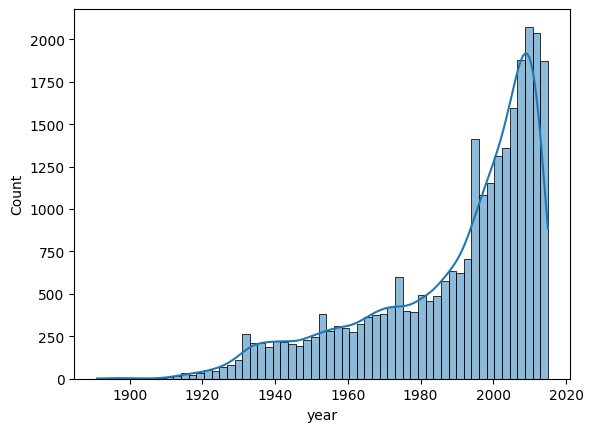

In [49]:
# Extreamos los años sin el 0, especificamos el rango minimo y maximo, pintamos el histograma
non_zero_years = df_movies_copy['year'][df_movies_copy['year'] != 0]
binrange = (non_zero_years.min(), non_zero_years.max())
sns.histplot(x=non_zero_years, kde=True, binrange=binrange)
plt.show()

Podemos observar como la mayoria de peliculas recopiladas han sido lanzadas a partir de los 2000+.

Por tanto estamos ante un conjunto de datos bastante moderno, con peliculas 'actuales'.

Es interesante ver como cada decada (mas o menos), hay un incremento puntual en el numero de peliculas.

In [89]:
def plot_year_genre (top, valor):
    plt.figure(figsize=(14, 8))
    sns.countplot(x='year', hue='genres', data=top)
    plt.xticks(rotation=90)
    plt.title(f'Distribución de los {valor} Géneros Más Frecuentes en los 20 Ultimos Años')
    plt.xlabel('Año')
    plt.ylabel('Número de Películas')
    plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [77]:
def year_genre_logic (valor, df_movies_copy=df_movies_copy):
    # Obtenemos los valores de genero
    genre = df_movies_copy['genres']

    # Obtenemos la probabilidad por cada genero
    genre_proba = genre.value_counts(normalize=True)

    # Capturamos los generos de mayor probabilidad (segun valor)
    top = genre_proba.head(valor).index 

    # Filtrar el DataFrame para incluir solo las filas con los géneros de mayor probabilidad en los últimos 20 años
    df_top_genres_last_20_years = df_movies_copy[(df_movies_copy['genres'].isin(top)) 
                                                & (df_movies_copy['year'] >= df_movies_copy['year'].max() - 20)]
    # llamada a funcion para representar el plot
    plot_year_genre (df_top_genres_last_20_years, valor=valor)
    

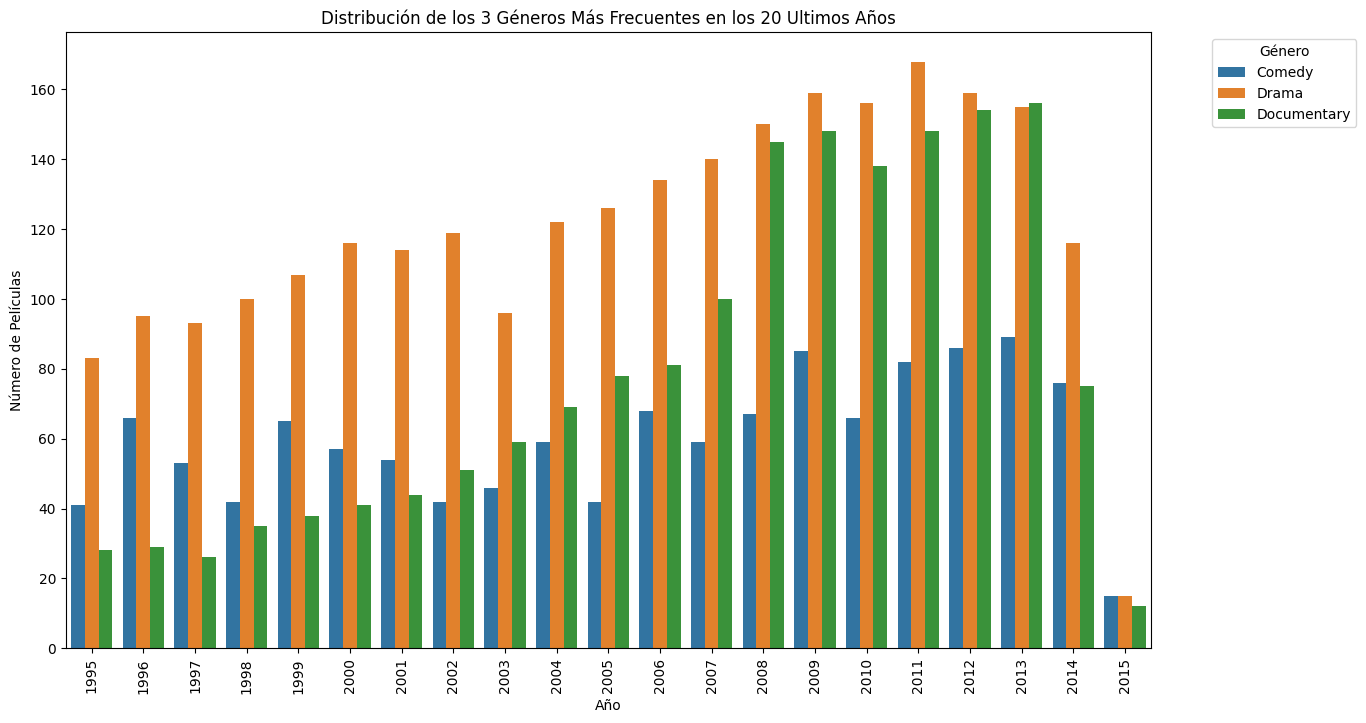

In [90]:
# Dinamicamente podemos analizar la cantidad de generos deseados a lo largo de los 20 ultimos años
year_genre_logic(3)

Analizado con 3 generos:

Es interesante observar como el genero Drama se mantiene como el mas visto, y a partir del 2008 el Documental practicamente
se situa a la par con Drama. 

Algo asi puede darse debido a factores sociales, culturales y educacionales (ej: el acceso global a internet a partir del 2000).

El genero comedia, mantiene la distribucion similar a lo largo de los años.

Tendencias en longitud de los titulos

In [91]:
df_movies_copy.head()

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995


In [92]:
# Extraemos la longitud de cada uno de los titulos (los espacios se incluyen tambien)
len_title = df_movies_copy['title'].apply(lambda x: len(x))

In [98]:
len_title

0         9
1         7
2        16
3        17
4        27
         ..
27273    21
27274    22
27275    11
27276    12
27277     9
Name: title, Length: 27278, dtype: int64

In [95]:
# Media, Mediana y desviacion estandar de las longitudes
mean_length = len_title.mean()
median_length = len_title.median()
std_dev = len_title.std()

print(f'Media de Longitud de Títulos: {mean_length:.2f}')
print(f'Mediana de Longitud de Títulos: {median_length:.2f}')
print(f'Desviación Estándar de Longitud de Títulos: {std_dev:.2f}')

Media de Longitud de Títulos: 16.62
Mediana de Longitud de Títulos: 15.00
Desviación Estándar de Longitud de Títulos: 8.99


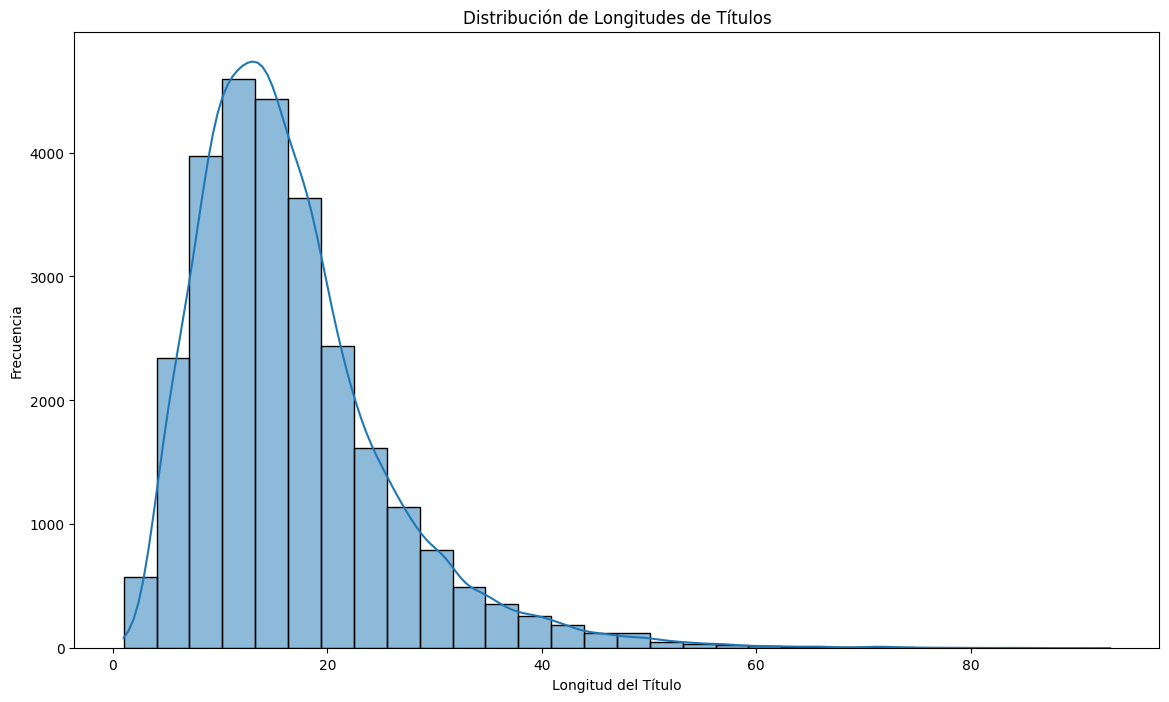

In [96]:
# Distribucion de las longitudes
plt.figure(figsize=(14, 8))
sns.histplot(len_title, bins=30, kde=True)
plt.title('Distribución de Longitudes de Títulos')
plt.xlabel('Longitud del Título')
plt.ylabel('Frecuencia')
plt.show()

Podemos observar como las distribucion tiende a sesgarse a la derecha, indicando valores atipicos.

Al desviarse 9 caracteres de la media (16), podemos ver que lo comun es tener titulos entre 7-25 caracteres. 

Esto indica que los titulos mas largos que 25 y mas cortos que 7 son los menos comunes.

Analisis de longitud en funcion del genero

In [137]:
def plot_lenTitle_genre (top, valor,len_title=len_title):
    plt.figure(figsize=(14, 8))
    sns.countplot(x=len_title, hue='genres', data=top, width=2)
    plt.xticks(rotation=90,ha='right', rotation_mode='anchor')
    plt.title(f'Distribución de las longitudes mas frecuentes sobre {valor} generos')
    plt.xlabel('Longitud del Título')
    plt.ylabel('Número de Películas')
    plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

In [122]:
def lenTitle_genre_logic (valor, df_movies_copy=df_movies_copy, len_title=len_title):
    # Obtenemos los valores de genero
    genre = df_movies_copy['genres']

    # Obtenemos la probabilidad por cada genero
    genre_proba = genre.value_counts(normalize=True)

    # Capturamos los generos de mayor probabilidad (segun valor)
    top = genre_proba.head(valor).index 

    # Filtrar el DataFrame para incluir solo las filas con los géneros y su longitud mas frecuente
    df_top_genres_ = df_movies_copy[(df_movies_copy['genres'].isin(top)) 
                                                & (len_title == df_movies_copy['title'].apply(len))]

    # llamada a funcion para representar el plot
    plot_lenTitle_genre (df_top_genres_, valor=valor)

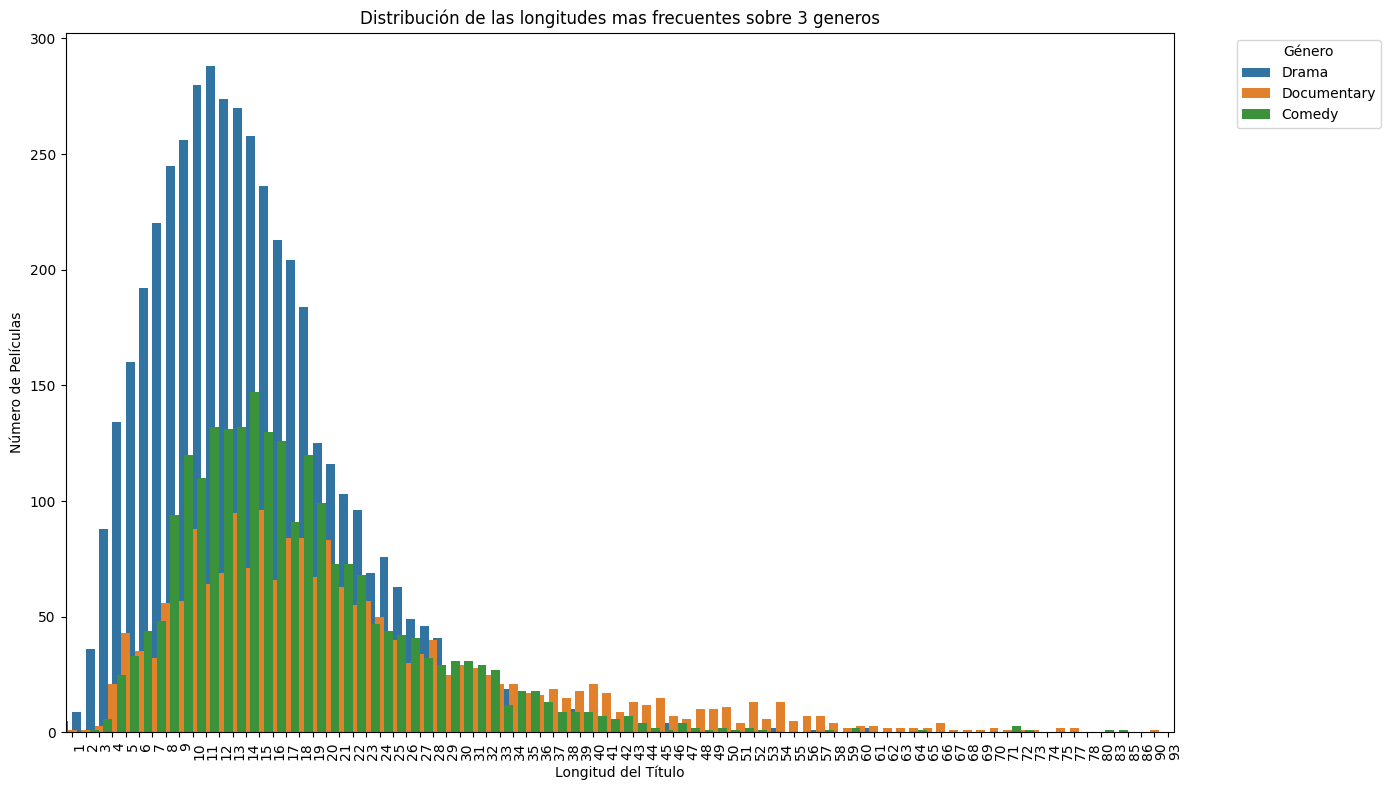

In [139]:
lenTitle_genre_logic(3)

Podemos observar las siguientes tendencias sobre tres generos:

- Drama, alberga la mayor cantidad de titulos cortos (entre 7-18 caracteres), la preferencia se inclina a titulos concisos y directos.
- Comedia, tambien presenta un estadio similar, la mayoria de sus titulos son cortos, tal vez la brevedad en el humor es mas efectivo.
- Documental, tiende a alargar mas los titulos (entendible ya que suele ser contenido informativo mas detallado).

En general estos tres generos no alargan en mas de 60 caracteres sus titulos.

Analisis de palabras claves (Todos los titulos)

In [7]:
def plot_cloudWords(wordcloud):
    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [8]:
def dicc_keyWords(common_words):
    # Crear una nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(common_words))

    # Funcion que pinta la nube de palabras
    plot_cloudWords(wordcloud)

In [9]:
def stopwords_keywords(valor,  plot, df_movies_copy=df_movies_copy):
    # Obtener la lista de stopwords en inglés
    stop_words = set(stopwords.words('english'))

    # Extraemos las palabras claves por titulo
    key_words = df_movies_copy['title'].apply(lambda x: x.split(' '))

    # Filtrar las palabras clave eliminando las stopwords (palabras con poco valor semantico)
    filtered_words = [word for title_words in key_words for word in title_words if word.lower() not in stop_words]

    # Obtener un conteo de las palabras filtradas
    filtered_word_counts = Counter(filtered_words)

    # Mostrar las palabras más comunes
    common_words = filtered_word_counts.most_common(valor)
    
    # Si el 0 se pasa como parametro devuelve el valor y frecuencia (sin el grafico)
    if plot != 0:
        dicc_keyWords(common_words)
    else: return common_words
    

In [149]:
# Descargamos un diccionario de palabras (nos ayuda a identificar las stopwords)
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jarod\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

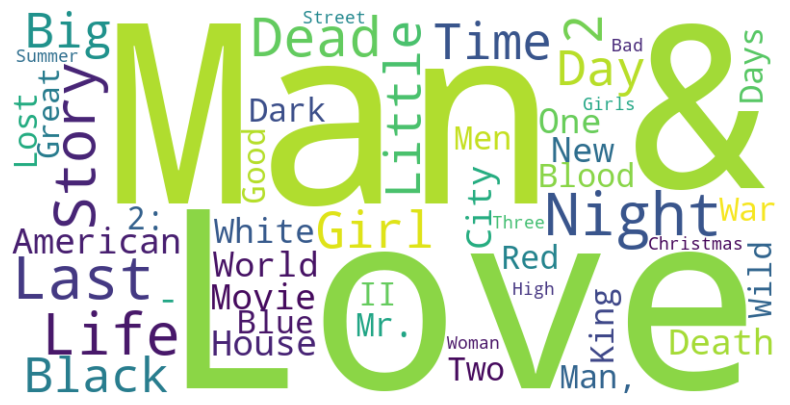

In [14]:
# Llamada a la funcion que extrae el numero de palabra clave, mostrando una nube de palabras o solo los valores

# EL primer parametro genera el numero de palabras clave a retornar
# El segundo parametro controla si se desea obtener el grafico o solo los valores (0->values, !=0 ->plot)
stopwords_keywords(50, 1) 

Podemos observar como las palabras mas identificables son 'Man', '&' y 'Love'.

Tambien visualizamos otras bastante frecuentes como: Little, Dead, Last, Night, etc.

Intuimos que estas palabras mas reconocibles, tienen una relacion con los generos analizados anteriormente.
Esto se debe a que expresan titulos cortos, faciles de recordar y llamativos.

Ejemplo de titulos (reales) con palabras relevantes: 

- Dead **Man** Walking	
- Toy **Story**
- Dracula: **Dead** and Loving It
- Feuer, Eis **&** Dosenbier

Analisis de palabras claves por genero

In [53]:
# Obtenemos las palabras claves y su frecuencia
keywords=stopwords_keywords(100, 0) 

#Transformamos en df las keywords obtenidas
df_palabras_clave = pd.DataFrame(keywords, columns=['Palabra', 'Frecuencia'])

# Crear una columna en df_movies_copy con las palabras clave extraídas de 'title'
df_movies_copy['Palabra'] = df_movies_copy['title'].str.split()

# Explotamos la lista para que cada palabra clave tenga su propia fila
df_movies_copy_exploded = df_movies_copy.explode('Palabra')

# Realizar la fusión basada en la coincidencia de palabras clave
df_completo = pd.merge(df_palabras_clave, df_movies_copy_exploded, on='Palabra', how='inner')

In [55]:
def plot_genre_keyword(top_palabras_por_genero):
    # Crear un gráfico de barras para representar probabilísticamente las palabras clave en cada género
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Frecuencia', y='Palabra', hue='genres', data=top_palabras_por_genero)
    plt.title('Probabilidad de Palabras Clave en los Géneros Más Frecuentes')
    plt.xlabel('Frecuencia')
    plt.ylabel('Palabra')
    plt.show()

In [67]:
def genre_keyword_logic(n_genre, n_kw):
    # Seleccionar los  géneros más frecuentes
    generos_frecuentes = df_completo['genres'].value_counts().head(n_genre).index
    # Filtrar df_completo por los géneros más frecuentes
    df_top_generos = df_completo[df_completo['genres'].isin(generos_frecuentes)]
    # Calcular las frecuencias de las palabras clave en cada género
    frecuencias_por_genero = df_top_generos.groupby(['genres', 'Palabra'])['Frecuencia'].sum().reset_index()
    # Para cada género, identificar las  palabras clave más usadas
    top_palabras_por_genero = frecuencias_por_genero.groupby('genres').apply(lambda x: x.nlargest(n_kw, 'Frecuencia')[['Palabra', 'Frecuencia']])

    plot_genre_keyword(top_palabras_por_genero)

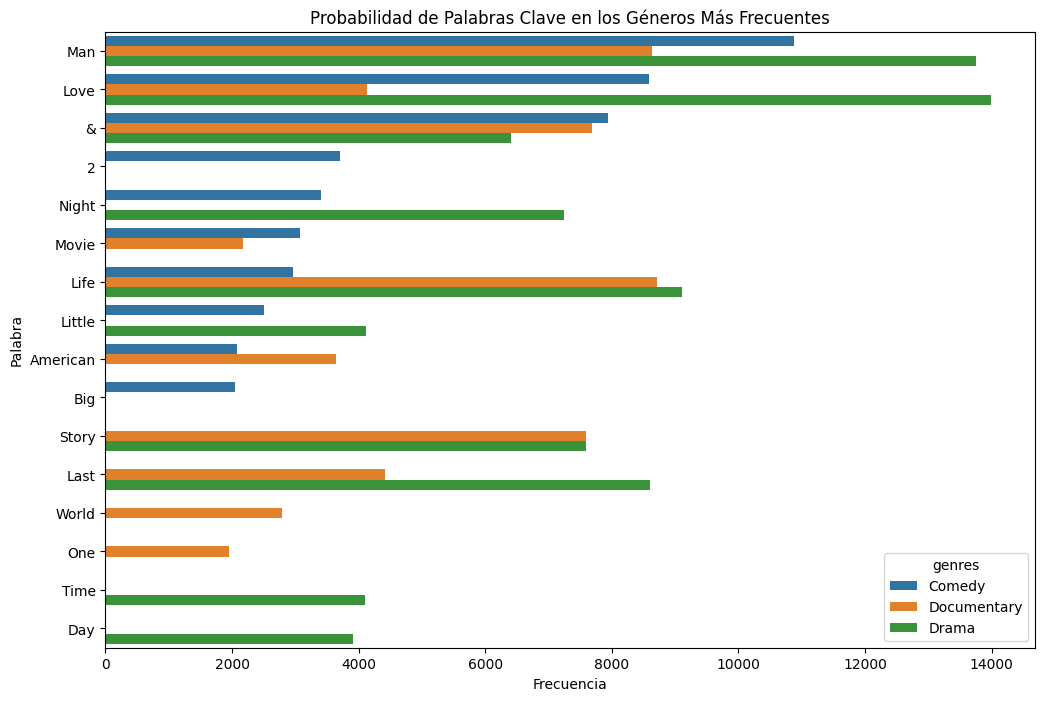

In [76]:
genre_keyword_logic(n_genre=3, n_kw=10)

Interesante ver como para cada uno de los tres generos mas frecuentes y las 10 palabras mas claves mas frecuentes:

- Drama: Las palabras clave más frecuentes parecen centrarse en temas emocionales y temporales, como "Man", "Love", "Night", "Life", "Last", "Time", y "Day". Esto sugiere que en películas de drama, se exploran temas relacionados con la vida, el amor y el paso del tiempo.

- Comedia: Las palabras clave sugieren elementos más genéricos y específicos de la industria cinematográfica, como "&", "Movie", "2", y "Big". Esto podría indicar que las comedias tienden a tener títulos que incluyen elementos humorísticos o secuelas (2) relacionadas con el entretenimiento cinematográfico.

- Documental: Las palabras clave reflejan temas y enfoques típicos de los documentales, como "Life", "American", "Story", "World" y "One". Esto sugiere que en documentales, se abordan temas relacionados con la vida, la cultura estadounidense, historias del mundo y singularidad ("One").